<a href="https://colab.research.google.com/github/parthugari-shivakoti/DataAnalysis/blob/main/Population_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

In [46]:
density = 'https://visaguide.world/asia/'
gdp = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_GDP'
response = requests.get(density)
response2 = requests.get(gdp)
print(response2)
print(response)

<Response [200]>
<Response [200]>


In [47]:
den_txt = response.text
gdp_txt = response2.text

In [48]:
print(den_txt[:500])
print("\n")
# print(gdp_txt)

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
	<link rel="profile" href="https://gmpg.org/xfn/11"> 
	<meta name='robots' content='index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1' />
	<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
	
	<!-- This site is optimized with the Yoast SEO plugin v24.2 - https://yoast.com/wordpress/plug




In [49]:
soup = BeautifulSoup(den_txt)

In [50]:
tables = soup.findAll('table')
print(tables[1])

<table>
<thead>
<tr>
<th>Country</th>
<th>Capital</th>
<th>Area km2</th>
<th>Population (2021)</th>
</tr>
</thead>
<tbody>
<tr>
<td>Afghanistan</td>
<td>Kabul</td>
<td>652,864</td>
<td>39,835,428</td>
</tr>
<tr>
<td>Armenia</td>
<td>Yerevan</td>
<td>29,743</td>
<td>2,968,127</td>
</tr>
<tr>
<td>Azerbaijan</td>
<td>Baku</td>
<td>86,600</td>
<td>10,223,342</td>
</tr>
<tr>
<td>Bahrain</td>
<td>Manama</td>
<td>760</td>
<td>1,748,296</td>
</tr>
<tr>
<td>Bangladesh</td>
<td>Dhaka</td>
<td>147,570</td>
<td>166,303,498</td>
</tr>
<tr>
<td>Bhutan</td>
<td>Thimphu</td>
<td>38,394</td>
<td>779,898</td>
</tr>
<tr>
<td>Brunei</td>
<td>Bandar Seri Begawan</td>
<td>5,765</td>
<td>441,532</td>
</tr>
<tr>
<td>Cambodia</td>
<td>Phnom Penh</td>
<td>181,035</td>
<td>16,946,438</td>
</tr>
<tr>
<td>China (PRC)</td>
<td>Beijing</td>
<td>9,596,961</td>
<td>1,444,216,107</td>
</tr>
<tr>
<td>East Timor</td>
<td>Dili</td>
<td>14,874</td>
<td>1,343,873</td>
</tr>
<tr>
<td>Georgia</td>
<td>Tbilisi</td>
<td>69,700<

<ipython-input-50-722c085d42ed>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  tables = soup.findAll('table')


In [51]:
columns = [head.text.rstrip('') for head in tables[1].find_all('th')]
columns

['Country', 'Capital', 'Area km2', 'Population (2021)']

In [52]:
rows = tables[1].find_all('tr')
print(columns,"\n",rows[1])

['Country', 'Capital', 'Area km2', 'Population (2021)'] 
 <tr>
<td>Afghanistan</td>
<td>Kabul</td>
<td>652,864</td>
<td>39,835,428</td>
</tr>


In [53]:
dataset=[]
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    dataset.append([ele for ele in cols if ele])
dataset

[['Afghanistan', 'Kabul', '652,864', '39,835,428'],
 ['Armenia', 'Yerevan', '29,743', '2,968,127'],
 ['Azerbaijan', 'Baku', '86,600', '10,223,342'],
 ['Bahrain', 'Manama', '760', '1,748,296'],
 ['Bangladesh', 'Dhaka', '147,570', '166,303,498'],
 ['Bhutan', 'Thimphu', '38,394', '779,898'],
 ['Brunei', 'Bandar Seri Begawan', '5,765', '441,532'],
 ['Cambodia', 'Phnom Penh', '181,035', '16,946,438'],
 ['China (PRC)', 'Beijing', '9,596,961', '1,444,216,107'],
 ['East Timor', 'Dili', '14,874', '1,343,873'],
 ['Georgia', 'Tbilisi', '69,700', '3,979,765'],
 ['Hong Kong', 'City of Victoria', '2,755', '7,552,810'],
 ['India', 'New Delhi', '3,287,263', '1,393,409,038'],
 ['Indonesia', 'Jakarta', '1,904,569', '276,361,783'],
 ['Iran', 'Tehran', '1,648,195', '85,028,759'],
 ['Iraq', 'Baghdad', '438,317', '41,179,350'],
 ['Israel', 'Jerusalem (disputed)', '20,770', '8,789,774'],
 ['Japan', 'Tokyo', '377,915', '126,050,804'],
 ['Jordan', 'Amman', '89,342', '10,269,021'],
 ['Kazakhstan', 'Nur-Sultan',

In [59]:
population_df = pd.DataFrame(dataset, columns=columns)
population_df = population_df.sort_values(by="Population (2021)", ascending=False)
population_df.head()

,Country,Capital,Area km2,Population (2021)
49,Vietnam,Hanoi,"331,212","98,168,833"
47,United Arab Emirates,Abu Dhabi,"83,600","9,991,089"
42,Tajikistan,Dushanbe,"143,100","9,749,627"
45,Turkey,Ankara,"783,562","85,042,738"
14,Iran,Tehran,"1,648,195","85,028,759"


In [63]:
population_df = population_df.rename(columns={'Population (2021)': 'Population'})
population_df = population_df.rename(columns={'Area km2': 'Area'})
population_df.head()

,Country,Capital,Area,Population
49,Vietnam,Hanoi,"331,212","98,168,833"
47,United Arab Emirates,Abu Dhabi,"83,600","9,991,089"
42,Tajikistan,Dushanbe,"143,100","9,749,627"
45,Turkey,Ankara,"783,562","85,042,738"
14,Iran,Tehran,"1,648,195","85,028,759"


In [64]:
population_df['Population'] = population_df['Population'].str.replace(',', '').astype(float)
population_df['Area'] = population_df['Area'].str.replace(',', '').astype(float)
population_df.head()

,Country,Capital,Area,Population
49,Vietnam,Hanoi,331212.0,98168833.0
47,United Arab Emirates,Abu Dhabi,83600.0,9991089.0
42,Tajikistan,Dushanbe,143100.0,9749627.0
45,Turkey,Ankara,783562.0,85042738.0
14,Iran,Tehran,1648195.0,85028759.0


In [65]:
population_df['population_density'] = population_df['Population'] / population_df['Area']
population_df.head()

,Country,Capital,Area,Population,population_density
49,Vietnam,Hanoi,331212.0,98168833.0,296.392742
47,United Arab Emirates,Abu Dhabi,83600.0,9991089.0,119.510634
42,Tajikistan,Dushanbe,143100.0,9749627.0,68.131565
45,Turkey,Ankara,783562.0,85042738.0,108.533515
14,Iran,Tehran,1648195.0,85028759.0,51.589016


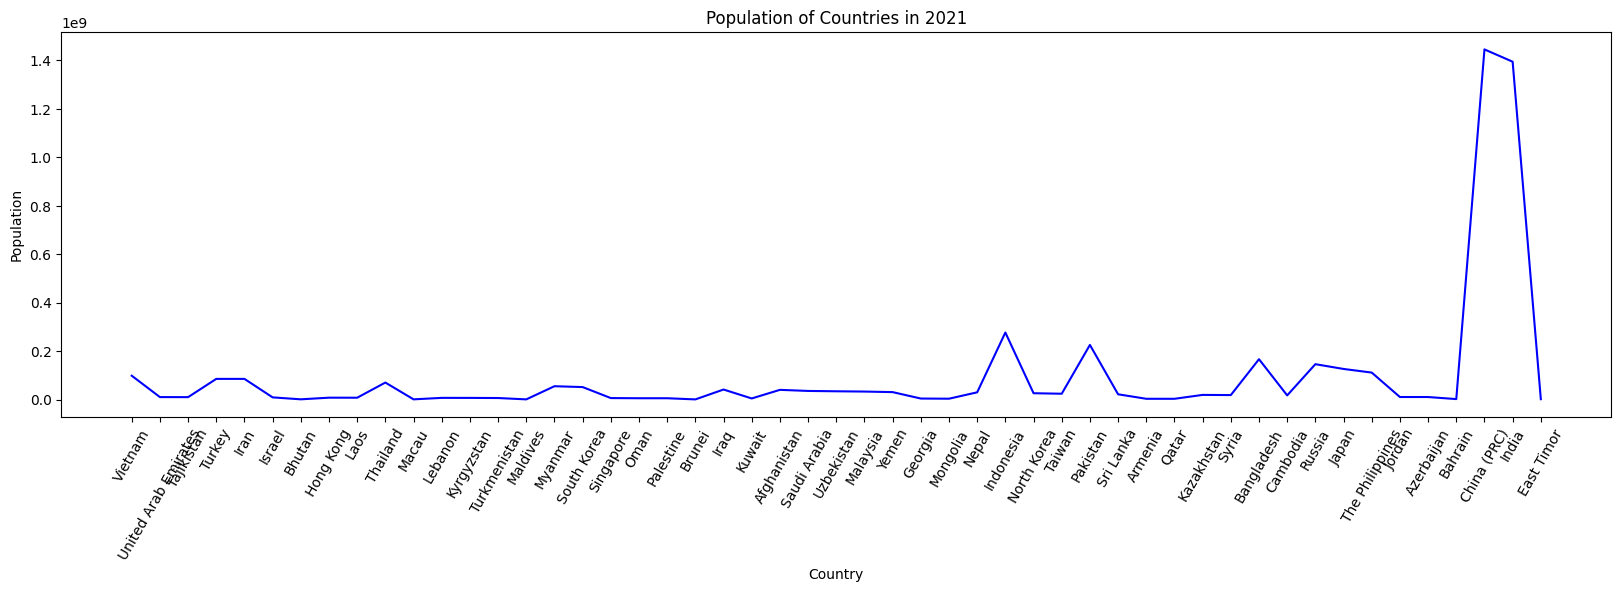

In [67]:
plt.figure(figsize=(20, 5))
plt.plot(population_df['Country'], population_df['Population'], color= 'blue')
plt.xticks(rotation=60)  # Rotates x-axis labels for better readability
plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population of Countries in 2021")
plt.show()


In [68]:
print(population_df[['Area', 'Population']].head(3))

        Area  Population
49  331212.0  98168833.0
47   83600.0   9991089.0
42  143100.0   9749627.0


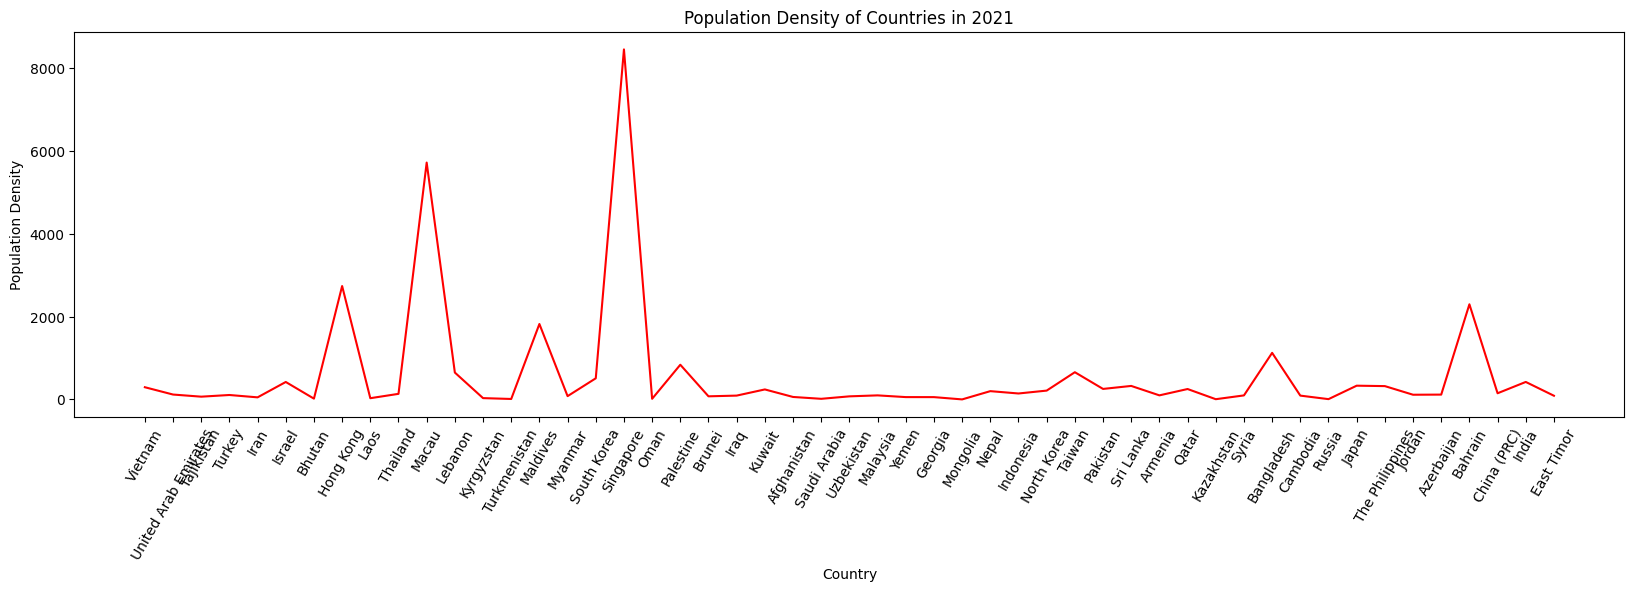

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(population_df['Country'], population_df['population_density'], color='red')
plt.xticks(rotation=60)
plt.xlabel("Country")
plt.ylabel("Population Density")
plt.title("Population Density of Countries in 2021")
plt.show()


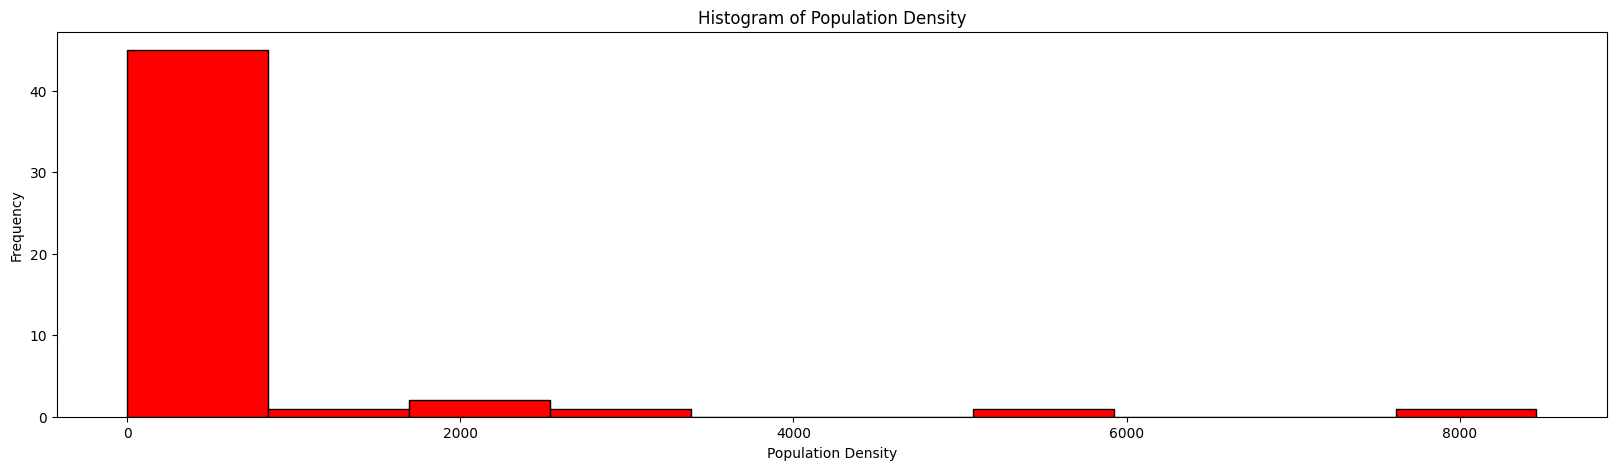

In [74]:
plt.figure(figsize=(20, 5))
plt.hist(population_df['population_density'], color='red', edgecolor='black', rwidth=20)
plt.xlabel("Population Density")
plt.ylabel("Frequency")
plt.title("Histogram of Population Density")
plt.show()


In [76]:
import seaborn as sns

# Bar Chart (Population Density by Country)

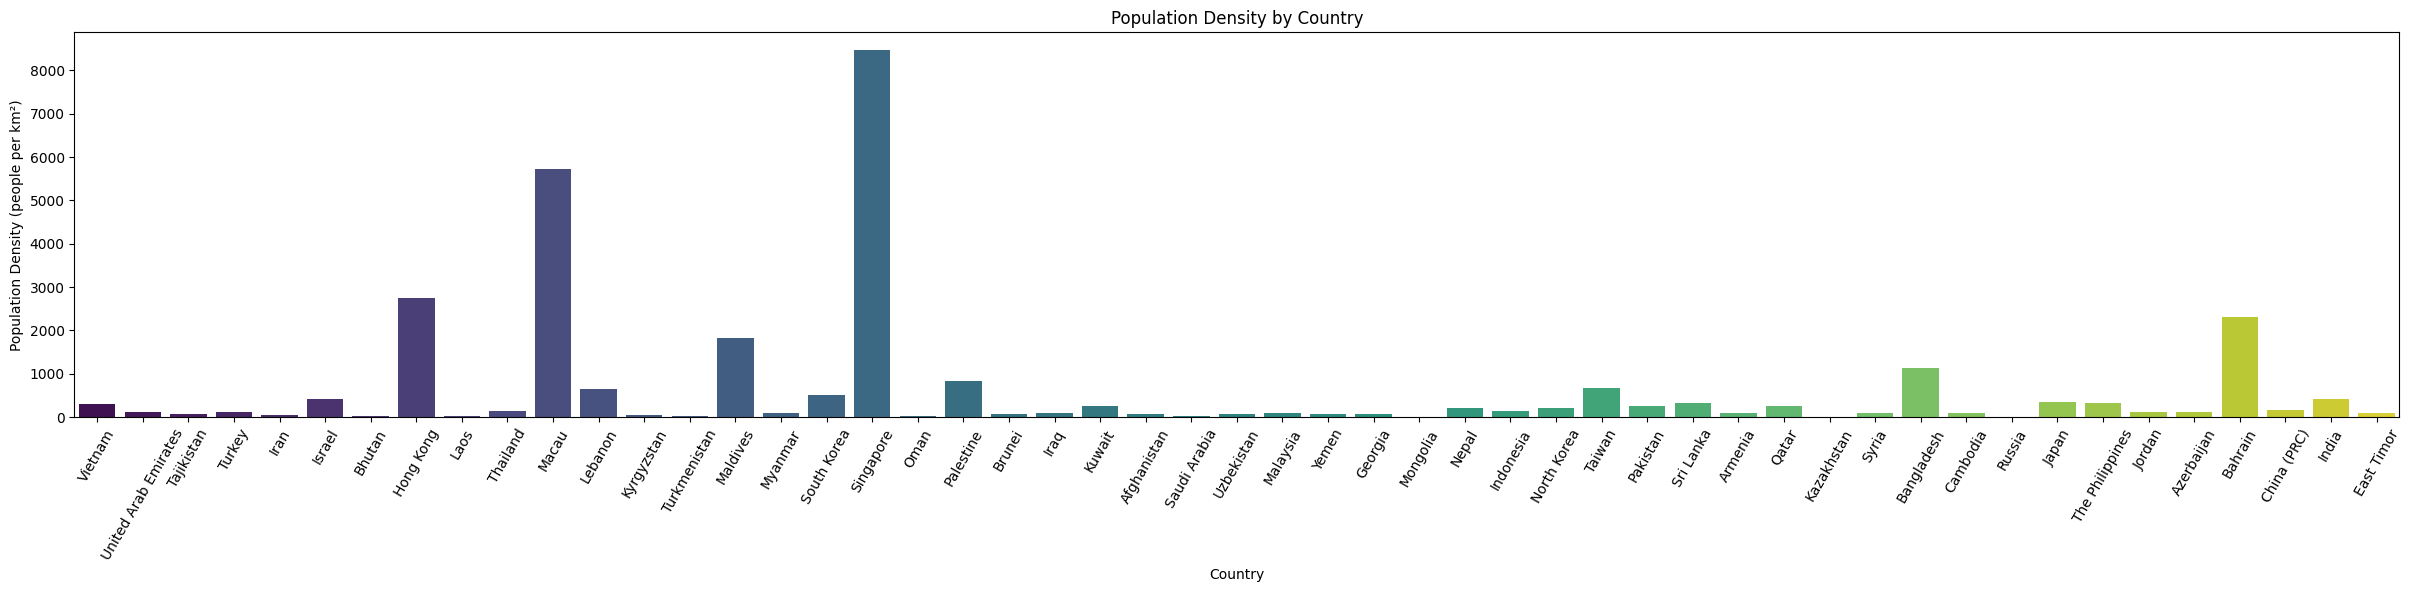

In [78]:
plt.figure(figsize=(30, 5))
sns.barplot(x="Country", y="population_density", hue="Country", data=population_df, palette="viridis", legend=False)
plt.xlabel("Country")
plt.ylabel("Population Density (people per km²)")
plt.title("Population Density by Country")
plt.xticks(rotation=60)
plt.show()


 # Line Graph (Population Density Trend)

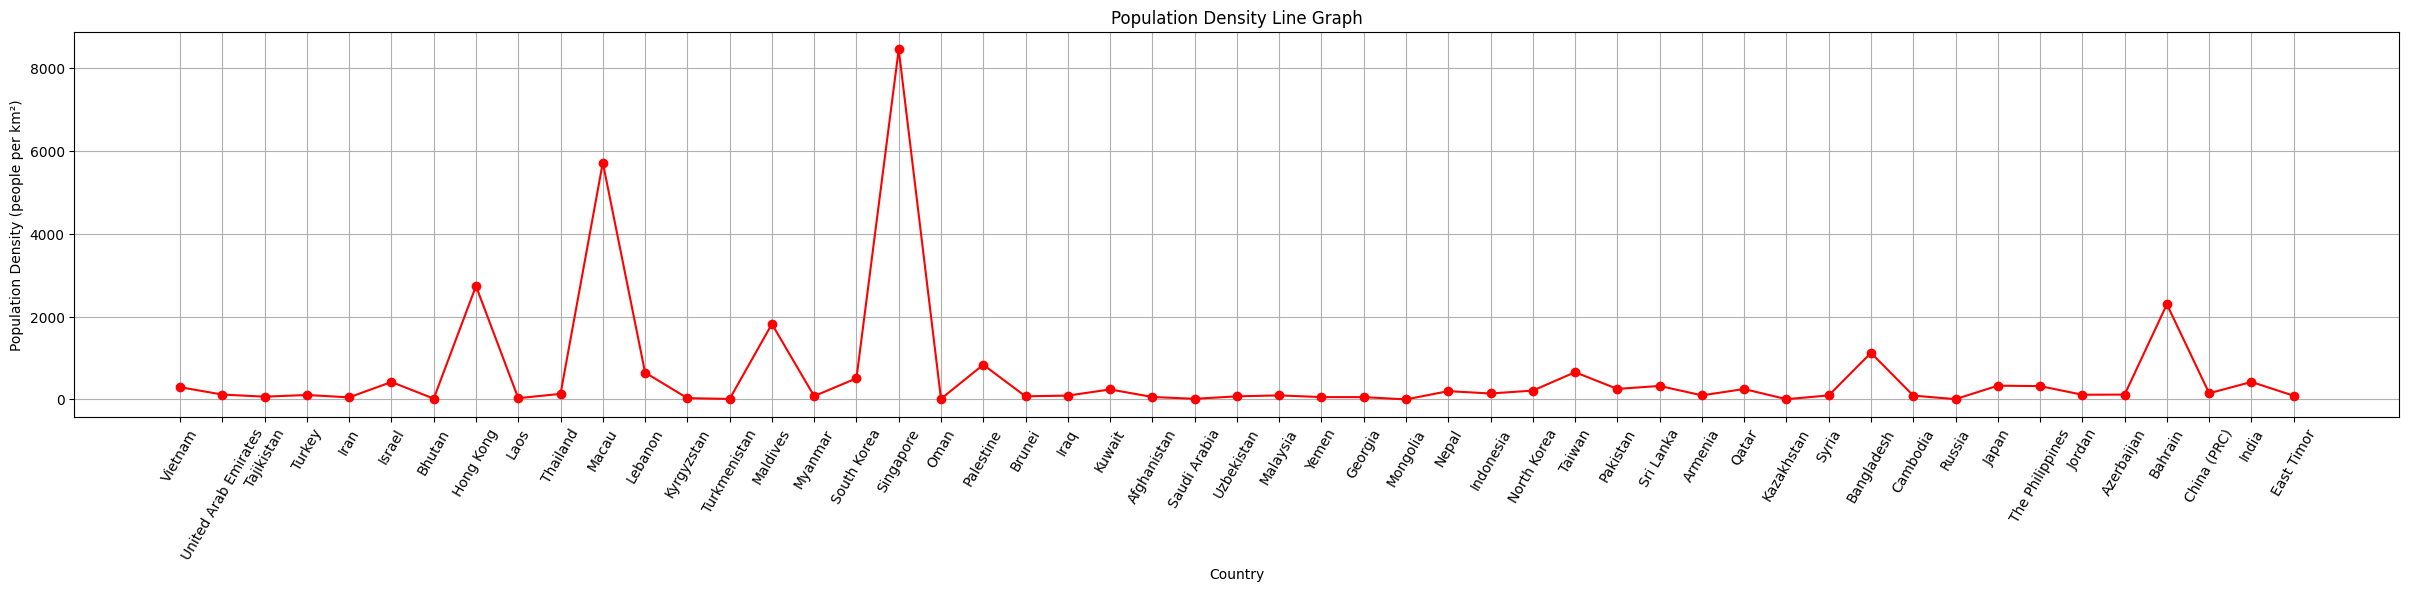

In [80]:
plt.figure(figsize=(30, 5))
plt.plot(population_df["Country"], population_df["population_density"], marker='o', linestyle='-', color='r')
plt.xlabel("Country")
plt.ylabel("Population Density (people per km²)")
plt.title("Population Density Line Graph")
plt.xticks(rotation=60)
plt.grid()
plt.show()


# Scatter Plot (Country vs. Population Density)

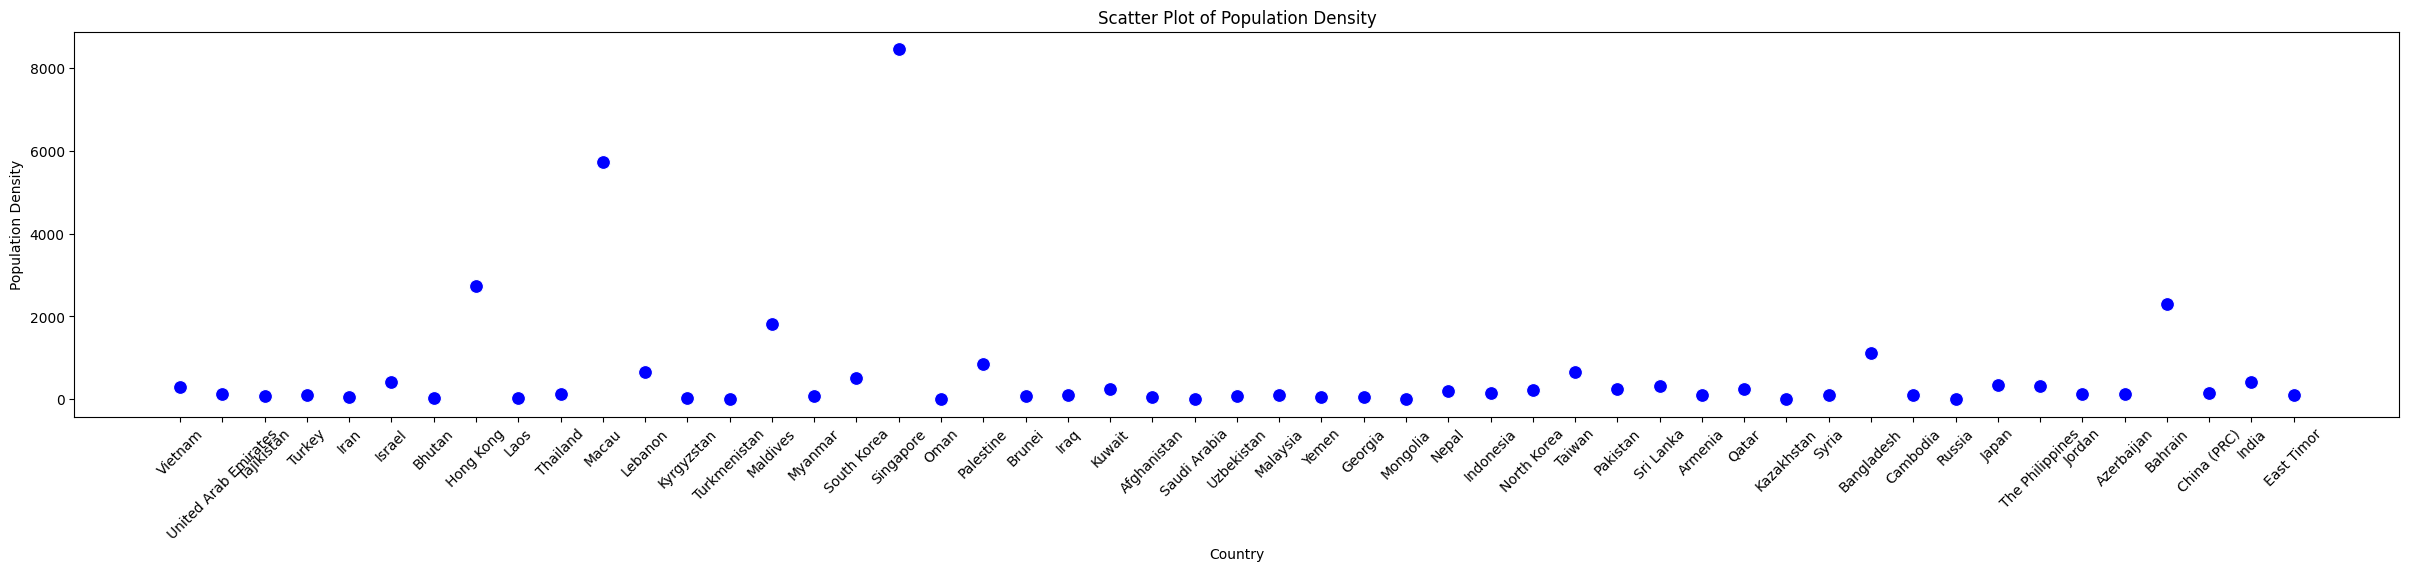

In [81]:
plt.figure(figsize=(30, 5))
sns.scatterplot(x=population_df["Country"], y=population_df["population_density"], color="blue", s=100)
plt.xlabel("Country")
plt.ylabel("Population Density")
plt.title("Scatter Plot of Population Density")
plt.xticks(rotation=45)
plt.show()

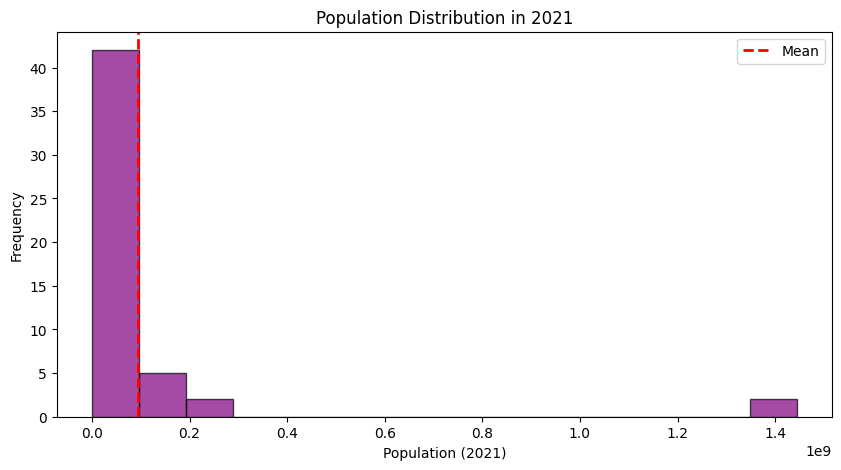

In [83]:
plt.figure(figsize=(10, 5))
plt.hist(population_df['Population'], bins=15, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(population_df['Population'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.xlabel("Population (2021)")
plt.ylabel("Frequency")
plt.title("Population Distribution in 2021")
plt.show()


In [ ]:
# GDP AND GDP PERCAPITA.

In [93]:
print(gdp_txt[:100])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-la


In [94]:
soup1 = BeautifulSoup(gdp_txt)

In [95]:
tables = soup1.find_all('table')
tables[0].find_all('th')

[<th>Region<br/>rank
 </th>,
 <th>Country/Territory
 </th>,
 <th>2024 GDP (nominal) in billions
 </th>]

In [98]:
gdp_table = tables[0]
headers = [th.text.strip() for th in gdp_table.find_all('th')]
headers[1] = 'Country'
headers[2] = 'GDP'
headers

['Regionrank', 'Country', 'GDP']

In [99]:
data = []
for row in gdp_table.find_all('tr')[1:]:
    cols = [td.text.strip() for td in row.find_all('td')]
    data.append(cols)
data[:10]

[['—', 'Asia', '42.72 trillion'],
 ['1', 'China', '18.53  trillion[2]'],
 ['2', 'Japan', '4.07  trillion[3]'],
 ['3', 'India', '3.88  trillion[4]'],
 ['4', 'Russia', '2.0 trillion'],
 ['5', 'South Korea', '1.76 trillion'],
 ['6', 'Indonesia', '1.47  trillion'],
 ['7', 'Turkey', '1.3 trillion'],
 ['8', 'Saudi Arabia', '1.11  trillion'],
 ['9', 'Taiwan', '803.0 billion']]

In [100]:
import re
def convert_trillion_to_billion(value):
    if isinstance(value, str) and 'trillion' in value.lower():
        value = value.lower().replace('trillion', '').strip()
        try:
            num = float(value)
            return round(num * 1000, 2)
        except ValueError:
            return value
    return value
for i in range(len(data)):
    data[i][2] = convert_trillion_to_billion(data[i][2])
for row in data[:10]:
  print(row)

['—', 'Asia', 42720.0]
['1', 'China', '18.53  [2]']
['2', 'Japan', '4.07  [3]']
['3', 'India', '3.88  [4]']
['4', 'Russia', 2000.0]
['5', 'South Korea', 1760.0]
['6', 'Indonesia', 1470.0]
['7', 'Turkey', 1300.0]
['8', 'Saudi Arabia', 1110.0]
['9', 'Taiwan', '803.0 billion']


In [104]:
gdp_df = pd.DataFrame(data, columns=headers)
print(gdp_df['GDP'].head())

0       42720.0
1    18.53  [2]
2     4.07  [3]
3     3.88  [4]
4        2000.0
Name: GDP, dtype: object


In [111]:
gdp_df['GDP'] = gdp_df['GDP'].str.replace('billion', '')
gdp_df.head()

,Regionrank,Country,GDP
0,—,Asia,NaN
1,1,China,18.53 [2]
2,2,Japan,4.07 [3]
3,3,India,3.88 [4]
4,4,Russia,NaN


In [115]:
gdp_df.loc[:, 'GDP'] = pd.to_numeric(gdp_df['GDP'], errors='coerce')
gdp_df = gdp_df.dropna(subset=['GDP'])
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 9 to 52
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Regionrank  44 non-null     object 
 1   Country     44 non-null     object 
 2   GDP         44 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


In [117]:
gdp_df.head(10)

,Regionrank,Country,GDP
9,9,Taiwan,803.00
10,10,Thailand,548.90
11,11,Israel,530.60
12,12,United Arab Emirates,527.80
13,13,Singapore,525.20
14,14,Philippines,471.50
15,15,Vietnam,465.80
16,16,Bangladesh,451.16
17,17,Malaysia,445.50
18,18,Iran,434.80


In [119]:
gdp_df.isnull().sum()

,0
Regionrank,0
Country,0
GDP,0


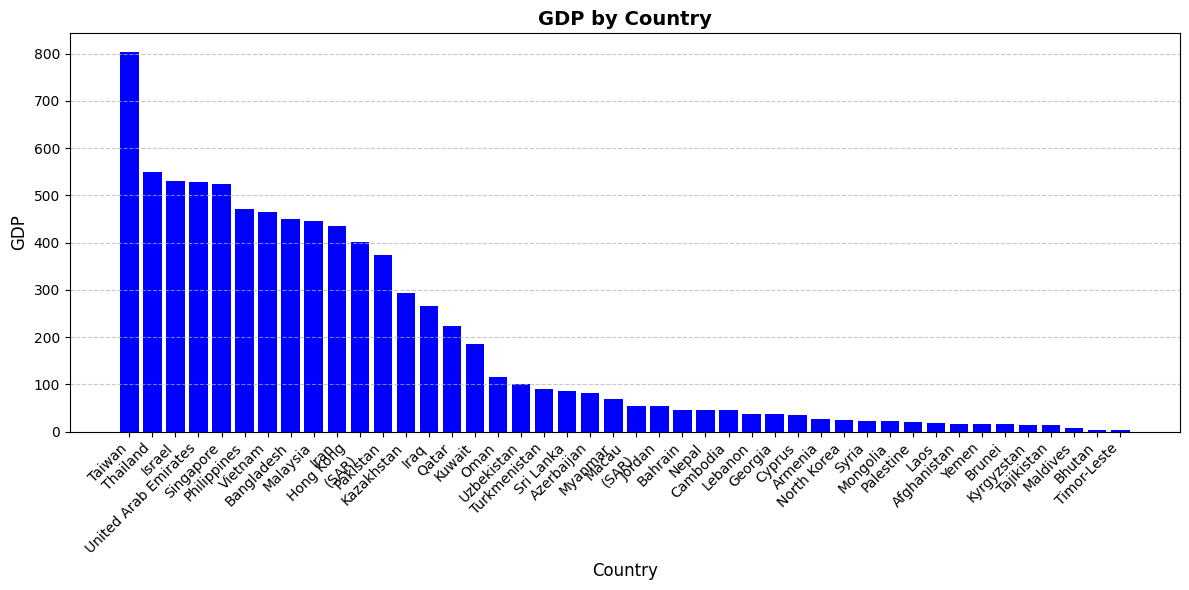

In [124]:
import matplotlib.pyplot as plt
gdp_df = gdp_df.sort_values(by='GDP', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(gdp_df['Country'], gdp_df['GDP'], color='blue')

plt.xlabel("Country", fontsize=12)
plt.ylabel("GDP", fontsize=12)
plt.title("GDP by Country", fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




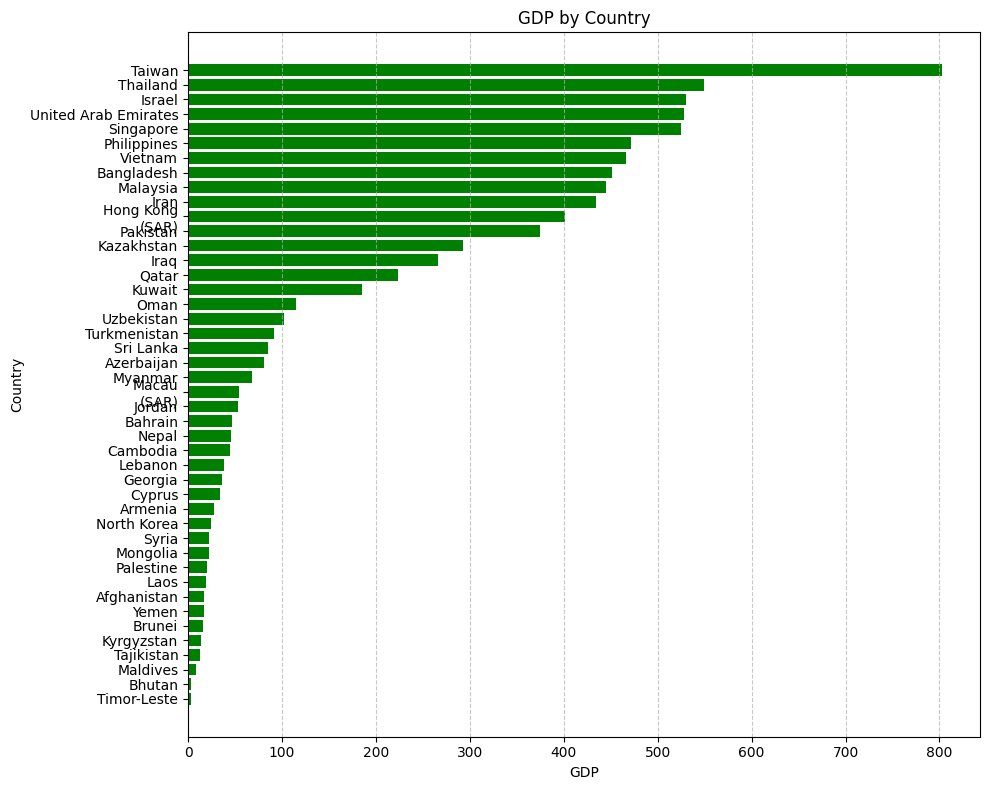

In [125]:
plt.figure(figsize=(10, 8))
plt.barh(gdp_df['Country'], gdp_df['GDP'], color='green')

plt.xlabel("GDP")
plt.ylabel("Country")
plt.title("GDP by Country")

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [129]:
print(population_df.head(),'\n')
print(gdp_df.head())

                 Country    Capital       Area  Population  population_density
49               Vietnam      Hanoi   331212.0  98168833.0          296.392742
47  United Arab Emirates  Abu Dhabi    83600.0   9991089.0          119.510634
42            Tajikistan   Dushanbe   143100.0   9749627.0           68.131565
45                Turkey     Ankara   783562.0  85042738.0          108.533515
14                  Iran     Tehran  1648195.0  85028759.0           51.589016 

   Regionrank               Country    GDP
9           9                Taiwan  803.0
10         10              Thailand  548.9
11         11                Israel  530.6
12         12  United Arab Emirates  527.8
13         13             Singapore  525.2
